<a href="https://colab.research.google.com/github/VishalShende358/Library-managment-system/blob/main/Liver_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title: Liver Disease Prediction | EDA and Model ACC {92%}**

#### **IMPORTING LIBRARIES**

In [45]:
# Manipulation and Visualasation
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [48]:
# Libraries for Machine Learning

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

In [8]:
# Display Settings

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.expand_frame_repr', False)

#### **IMPORTING OUR LIVER DISEASE DATASET**

In [9]:
df=pd.read_csv('/content/Liver_disease_data.csv')
df.head()

,Age,Gender,BMI,AlcoholConsumption,Smoking,GeneticRisk,PhysicalActivity,Diabetes,Hypertension,LiverFunctionTest,Diagnosis
0,58,0,35.858,17.273,0,1,0.659,0,0,42.734,1
1,71,1,30.732,2.201,0,1,1.671,1,0,67.310,1
2,48,0,19.971,18.501,0,0,9.928,0,0,63.739,0
3,34,1,16.615,12.633,0,0,5.630,0,0,64.556,1
4,62,1,16.066,1.088,0,1,3.566,1,0,77.869,1


#### **EXPLORATORY DATA ANALYSIS (EDA)**

**SHAPE OF DATASET**


In [10]:
print(f"The dataset has {df.shape[0]} Rows and {df.shape[1]} columns")

The dataset has 1700 Rows and 11 columns


**INFO OF DATASET**

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1700 non-null   int64  
 1   Gender              1700 non-null   int64  
 2   BMI                 1700 non-null   float64
 3   AlcoholConsumption  1700 non-null   float64
 4   Smoking             1700 non-null   int64  
 5   GeneticRisk         1700 non-null   int64  
 6   PhysicalActivity    1700 non-null   float64
 7   Diabetes            1700 non-null   int64  
 8   Hypertension        1700 non-null   int64  
 9   LiverFunctionTest   1700 non-null   float64
 10  Diagnosis           1700 non-null   int64  
dtypes: float64(4), int64(7)
memory usage: 146.2 KB


**DESCRIPTIVE ANALYSIS**

In [12]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Age,1700.000,50.394,17.642,20.000,35.000,51.000,66.000,80.000
Gender,1700.000,0.504,0.500,0.000,0.000,1.000,1.000,1.000
BMI,1700.000,27.700,7.210,15.005,21.455,27.925,33.958,39.993
AlcoholConsumption,1700.000,9.832,5.757,0.004,4.842,9.828,14.872,19.952
Smoking,1700.000,0.292,0.455,0.000,0.000,0.000,1.000,1.000
GeneticRisk,1700.000,0.522,0.666,0.000,0.000,0.000,1.000,2.000
PhysicalActivity,1700.000,5.001,2.847,0.002,2.622,5.023,7.402,9.995
Diabetes,1700.000,0.142,0.350,0.000,0.000,0.000,0.000,1.000
Hypertension,1700.000,0.155,0.362,0.000,0.000,0.000,0.000,1.000
LiverFunctionTest,1700.000,59.864,22.996,20.019,40.024,59.513,79.429,99.991


- Age: The minimum age preset in the dataset is 20 and the maximum age is 80 with an average of 54.
- BMI: The minimum BMI preset in the dataset is 15 and the maximum BMI is 40 with an average of 27.7.
- Alcohol Consumption: The minimum alcohol consumption preset in the dataset is 0 and the maximum alcohol consumption is 20 with an average of 9.8
- Physical Activity: The minimum number is 0 and the maximum number is 10 with an average of 5
- Liver Function Test: The minimum number is 20.019 and the maximum number is 100 with an average of 59.9

All other coloumns are boolean 0 and 1

**MISSING VALUES**

In [13]:
df.isnull().sum()

,0
Age,0
Gender,0
BMI,0
AlcoholConsumption,0
Smoking,0
GeneticRisk,0
PhysicalActivity,0
Diabetes,0
Hypertension,0
LiverFunctionTest,0


- NO Missing Values

### **VISUALISATION**

#### **UNIVARIATE ANALYSIS**

**AGE DISTIBUTION**

In [14]:
df['Age'].value_counts().reset_index()

,Age,count
0,52,42
1,45,41
2,70,39
3,68,37
4,66,37
...,...,...
56,50,21
57,37,21
58,61,20
59,62,18


In [16]:
plt = px.histogram(df, x="Age", title="Age Distribution", color_discrete_sequence=px.colors.sequential.Cividis)
plt.show()


-
Most of the patients are in the age group of 45-70.

##### **GENDER DISTIBUTION**

In [17]:
plt = px.pie(df, names="Gender", title="Gender Distribution", color_discrete_sequence=px.colors.sequential.Mint_r)
plt.show()

- Gender: Male (0) or Female (1)

MALE are 49.6% and FEMALE are 50.4%

##### **BMI DISTIBUTION**

In [18]:
plt = px.histogram(df, x="BMI", title="BMI Distribution", color_discrete_sequence=px.colors.sequential.Emrld_r)
plt.show()

**ALCOHOL CONSUMPTION DISTIBUTION**

In [20]:
plt = px.histogram(df, x="AlcoholConsumption", title="AlcoholConsumption Distribution", color_discrete_sequence=['green'])
plt.show()

**SMOKING DISTIBUTION**

In [21]:
plt = px.pie(df, names="Smoking", title="Smoking Distribution", color_discrete_sequence=px.colors.sequential.Viridis)
plt.show()

- Smoking: No (0) or Yes (1)

NO are 70.8% and YES are 29.2%

**GENETIC RISK DISTIBUTION**

In [27]:
plt = px.pie(df, names="GeneticRisk", title="GeneticRisk Distribution", color_discrete_sequence=px.colors.sequential.Aggrnyl)
plt.show()

- Genetic Risk: Low (0), Medium (1), High (2)

0 = LOW (57.5%)
1 = MEDIUM (32.8%)
2 = HIGH (9.71%)

**PHYSICAL ACTIVITY DISTIBUTION**

In [28]:
plt = px.histogram(df, x="PhysicalActivity", title="PhysicalActivity Distribution", color_discrete_sequence=px.colors.sequential.amp_r)
plt.show()

**DIABETES DISTIBUTION**

In [29]:
plt = px.pie(df, names="Diabetes", title="Diabetes Distribution", color_discrete_sequence=px.colors.sequential.Agsunset)
plt.show()

Diabetes: No (0) or Yes (1).

NO are 85.8% and YES are 14.2%

**HYPERTENSION DISTIBUTION**

In [30]:
plt = px.pie(df, names="Hypertension", title="Hypertension Distribution", color_discrete_sequence=px.colors.sequential.Blackbody)
plt.show()

Hypertension: No (0) or Yes (1).

NO are 84.5% and YES are 15.5%

**LIVER FUNCTION TEST DISTIBUTION**

In [33]:
plt = px.histogram(df, x="LiverFunctionTest", title="LiverFunctionTest Distribution", color_discrete_sequence=px.colors.sequential.ice)
plt.show()

Liver Function Test: Range: 20 to 100.

**DIAGNOSIS (TARGER VARIABLE) DISTIBUTION**

In [34]:
plt = px.pie(df, names="Diagnosis", title="Diagnosis Distribution", color_discrete_sequence=px.colors.sequential.Magenta)
plt.show()

Diagnosis: Binary indicator (0 or 1) of liver disease presence.

NO are 44.9% and YES are 55.1%

**Ploting Each Variable Against Target Variable**

In [35]:
for col in df.columns:
    if col is not "Diagnosis":
        plt = px.histogram(df, x=col, color = "Diagnosis", title=f"{col} Distribution", color_discrete_sequence=px.colors.sequential.Agsunset_r)
        plt.show()

**CORRELATION MATRIX | HEATMAP**

<Axes: >

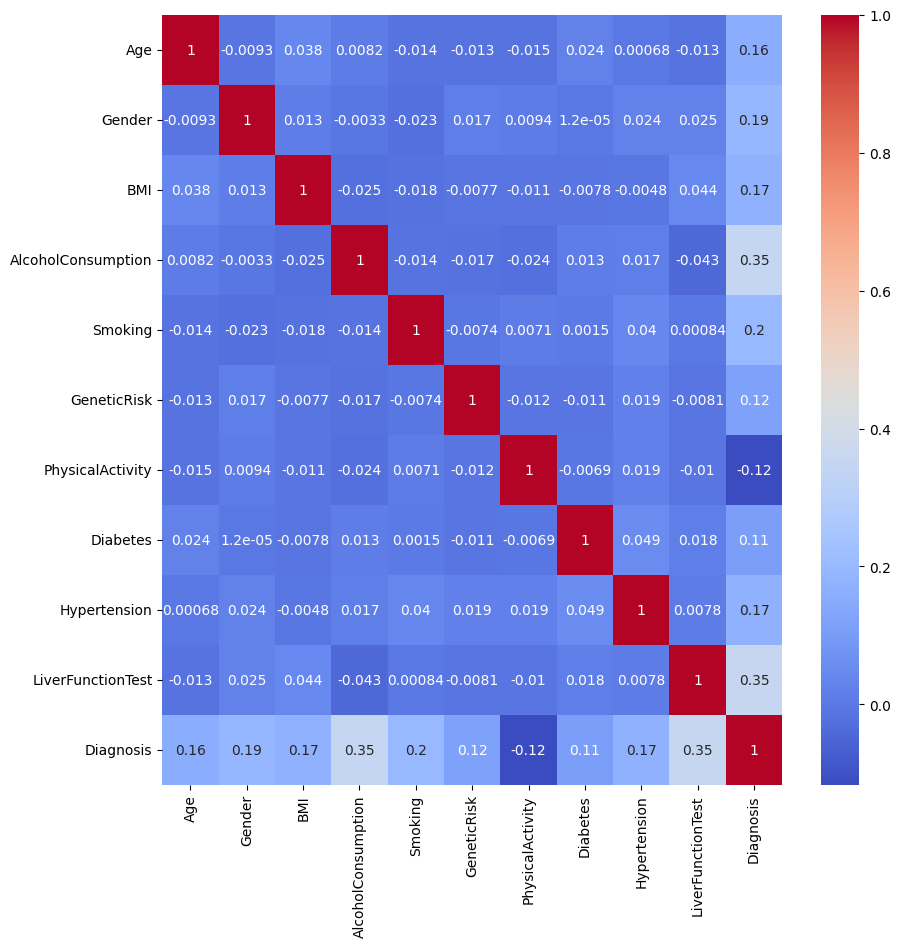

In [38]:
# Calculate the correlation matrix
corr = df.corr()
plt = plt.figure(figsize=(10, 10))

sns.heatmap(corr, annot=True, cmap="coolwarm")

# **MACHINE LEARNING MODEL**

**SPLIT DATA INTO FEATURES AND TARGET**

In [39]:
X = df.drop("Diagnosis", axis=1)
y = df["Diagnosis"]

SPLIT DATA INTO TRAINING AND TEST SETS

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

SCALE DATA

In [41]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

MODEL BUILDING

In [42]:
# Define the models
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "CatBoost": CatBoostClassifier(iterations=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, random_state=42),
    "LightGBM": LGBMClassifier(n_estimators=100, random_state=42)
}

# Train the models
for name, model in models.items():
    model.fit(X_train_scaled, y_train)

# Evaluate the models
model_scores = {}

for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    model_scores[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.2f}")

# Find the best model
best_model_name = max(model_scores, key=model_scores.get)
best_model_score = model_scores[best_model_name]
print(f"Best model: {best_model_name} with accuracy: {best_model_score:.2f}")

Learning rate set to 0.097041
0:	learn: 0.6583846	total: 49.3ms	remaining: 4.88s
1:	learn: 0.6299435	total: 51.2ms	remaining: 2.51s
2:	learn: 0.6045433	total: 53ms	remaining: 1.71s
3:	learn: 0.5799878	total: 54.7ms	remaining: 1.31s
4:	learn: 0.5566483	total: 56.4ms	remaining: 1.07s
5:	learn: 0.5372489	total: 58.1ms	remaining: 911ms
6:	learn: 0.5180692	total: 59.7ms	remaining: 794ms
7:	learn: 0.5020788	total: 61.4ms	remaining: 706ms
8:	learn: 0.4867113	total: 63.1ms	remaining: 638ms
9:	learn: 0.4732066	total: 64.8ms	remaining: 584ms
10:	learn: 0.4613419	total: 66.4ms	remaining: 537ms
11:	learn: 0.4487679	total: 68.4ms	remaining: 501ms
12:	learn: 0.4374601	total: 70.1ms	remaining: 469ms
13:	learn: 0.4275321	total: 71.8ms	remaining: 441ms
14:	learn: 0.4179599	total: 73.5ms	remaining: 417ms
15:	learn: 0.4091807	total: 75.2ms	remaining: 395ms
16:	learn: 0.3998806	total: 76.9ms	remaining: 375ms
17:	learn: 0.3918657	total: 78.5ms	remaining: 358ms
18:	learn: 0.3848668	total: 80.1ms	remaining: 

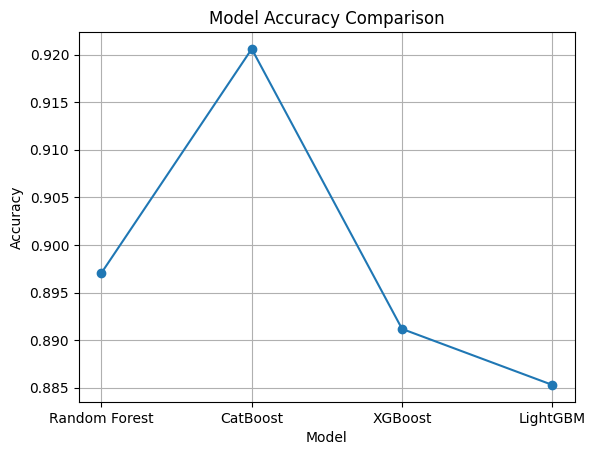

In [47]:
# Extract model names and accuracies
model_names = list(model_scores.keys())
accuracies = list(model_scores.values())

# Create a line chart
plt.plot(model_names, accuracies, marker='o')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.grid(True)
plt.show()

In [49]:
# MODEL BUILDING
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Support Vector Machine": SVC(),
    "Linear Regression": LinearRegression()  # Add Linear Regression
}

# Train and evaluate models
model_scores = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)

    if name == "Linear Regression":  # Handle Linear Regression differently
        accuracy = model.score(X_test_scaled, y_test)  # Use R-squared for Linear Regression
    else:
        accuracy = accuracy_score(y_test, y_pred)

    model_scores[name] = accuracy
    print(f"{name} Accuracy: {accuracy:.2f}")

Logistic Regression Accuracy: 0.81
Decision Tree Accuracy: 0.83
Support Vector Machine Accuracy: 0.88
Linear Regression Accuracy: 0.43


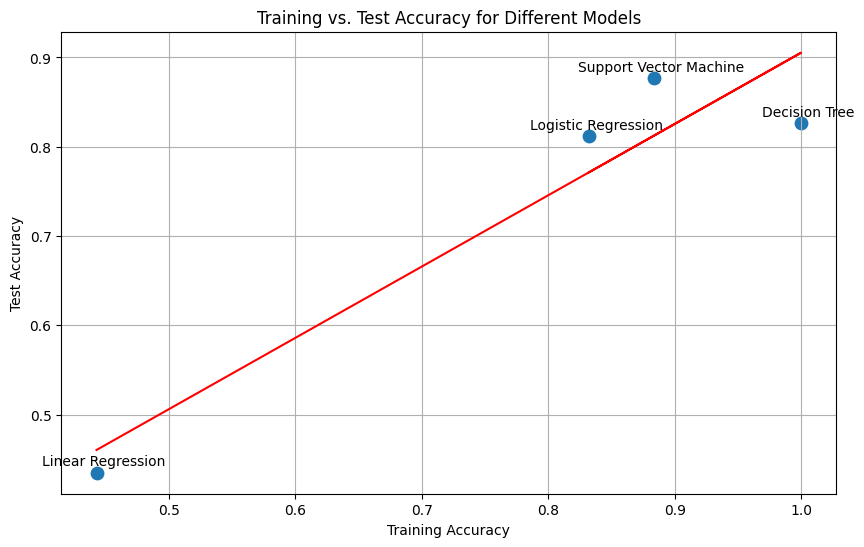

In [52]:
train_scores = []
test_scores = []
model_names = []

for name, model in models.items():
    model_names.append(name)

    # Train accuracy
    y_train_pred = model.predict(X_train_scaled)
    if name == "Linear Regression":
        train_accuracy = model.score(X_train_scaled, y_train)
    else:
        train_accuracy = accuracy_score(y_train, y_train_pred)
    train_scores.append(train_accuracy)

    # Test accuracy
    y_test_pred = model.predict(X_test_scaled)
    if name == "Linear Regression":
        test_accuracy = model.score(X_test_scaled, y_test)
    else:
        test_accuracy = accuracy_score(y_test, y_test_pred)
    test_scores.append(test_accuracy)

# Create scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(train_scores, test_scores, s=80)

# Add labels and title
plt.xlabel('Training Accuracy')
plt.ylabel('Test Accuracy')
plt.title('Training vs. Test Accuracy for Different Models')

# Annotate points with model names
for i, name in enumerate(model_names):
    plt.annotate(name, (train_scores[i], test_scores[i]), textcoords="offset points", xytext=(5,5), ha='center')

# Fit a line
m, b = np.polyfit(train_scores, test_scores, 1)
plt.plot(train_scores, m*np.array(train_scores) + b, color='red')

plt.grid(True)
plt.show()


**Deep Learning**


In [54]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv1D, MaxPooling1D

# ANN Model
ann_model = Sequential()
ann_model.add(Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)))
ann_model.add(Dense(32, activation='relu'))
ann_model.add(Dense(1, activation='sigmoid'))

ann_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
ann_model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, validation_data=(X_test_scaled, y_test))

# CNN Model
X_train_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

cnn_model = Sequential()
cnn_model.add(Conv1D(32, 3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)))
cnn_model.add(MaxPooling1D(2))
cnn_model.add(Conv1D(64, 3, activation='relu'))
cnn_model.add(MaxPooling1D(2))
cnn_model.add(Flatten())
cnn_model.add(Dense(1, activation='sigmoid'))

cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_data=(X_test_cnn, y_test))

Epoch 1/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5654 - loss: 0.6716 - val_accuracy: 0.7412 - val_loss: 0.5400
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8081 - loss: 0.4793 - val_accuracy: 0.7971 - val_loss: 0.4328
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8282 - loss: 0.4135 - val_accuracy: 0.8029 - val_loss: 0.3981
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8334 - loss: 0.3729 - val_accuracy: 0.8147 - val_loss: 0.4018
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8347 - loss: 0.3845 - val_accuracy: 0.8294 - val_loss: 0.3900
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8450 - loss: 0.3544 - val_accuracy: 0.8265 - val_loss: 0.3863
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8358 - loss: 0.3645 - val_accuracy: 0.8412 - val_loss: 0.3766
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.8469 - loss: 0.3476 - val_accuracy: 0.8382 - val_loss:

**RNN**

In [56]:
from tensorflow.keras.layers import LSTM

# RNN Model
X_train_rnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_rnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

rnn_model = Sequential()
rnn_model.add(LSTM(64, input_shape=(X_train_rnn.shape[1], 1)))
rnn_model.add(Dense(1, activation='sigmoid'))

rnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
rnn_model.fit(X_train_rnn, y_train, epochs=10, batch_size=32, validation_data=(X_test_rnn, y_test))

Epoch 1/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - accuracy: 0.5479 - loss: 0.6695 - val_accuracy: 0.6824 - val_loss: 0.5532
Epoch 2/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step - accuracy: 0.6962 - loss: 0.5664 - val_accuracy: 0.7235 - val_loss: 0.5333
Epoch 3/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7223 - loss: 0.5510 - val_accuracy: 0.7206 - val_loss: 0.5227
Epoch 4/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7297 - loss: 0.5446 - val_accuracy: 0.7324 - val_loss: 0.5212
Epoch 5/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7408 - loss: 0.5167 - val_accuracy: 0.7471 - val_loss: 0.5065
Epoch 6/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7494 - loss: 0.5213 - val_accuracy: 0.7500 - val_loss: 0.4904
Epoch 7/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - accuracy: 0.7657 - loss: 0.4837 - val_accuracy: 0.8029 - val_loss: 0.4695
Epoch 8/10
43/43 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.7745 - loss: 0.4935 - val_accuracy: 0.8206 - v